In [1]:
using PyPlot

include("synthetic_experiments_constant.jl")

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


run_experiments (generic function with 1 method)

In [2]:
#Set parameters
num_trials = 20
sigma = 1.0
k=16                             # true number of pieces/rectangles of function
n_vals=[k*6,k*10, k*25, k*40, k*70, k*100, k*150,k*200,k*400,k*500]   #  number of samples
d = 10                             # dimension of samples
z = 2                             # the number of dimensions the piecewise functions are defined in

mses_mean, mses_std, times_mean, times_std, pieces_mean, pieces_std = run_experiments(num_trials, sigma, k, n_vals, d, z)
println()

In [37]:
algo_colors = Dict([("merging_k", "blue"), ("merging_kover2", "green"), ("merging_kover4", "red"), ("merging_kover8", "olive"),("true fit", "darkorchid"),("CART fit 16", "gray"),("CART fit 24", "black")])
algo_names = Dict([("merging_k", "merging, 113 pieces"), ("merging_kover2", "merging, 59 pieces"), ("merging_kover4", "merging, 27 pieces"), ("merging_kover8", "merging, 11 pieces"),("true fit", "true fit, 16 pieces"),("CART fit 16","CART, 16 pieces"),("CART fit 24","CART, 24 pieces")])

Dict{String,String} with 7 entries:
  "CART fit 24"    => "CART, 24 pieces"
  "merging_kover8" => "merging, 11 pieces"
  "true fit"       => "true fit, 16 pieces"
  "merging_kover4" => "merging, 27 pieces"
  "CART fit 16"    => "CART, 16 pieces"
  "merging_k"      => "merging, 113 pieces"
  "merging_kover2" => "merging, 59 pieces"

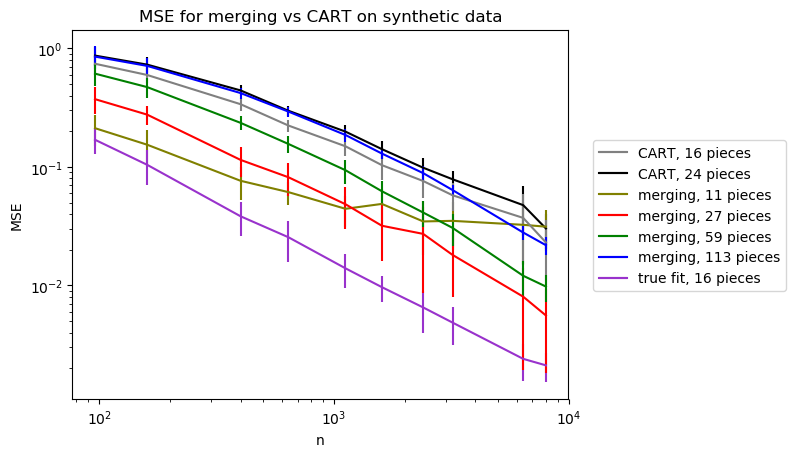

PyObject <matplotlib.legend.Legend object at 0x0000000040997940>

In [39]:
for (algo_name, algo_mses) in mses_mean
    errorbar(n_vals, algo_mses, yerr=mses_std[algo_name], label=algo_names[algo_name], color=algo_colors[algo_name])
end
#plot(n_vals, 200.0 ./ n_vals, label="C/n")
#plot(n_vals, 5.0 ./ sqrt(n_vals), label="C/sqrt(n)", color="olive")
title("MSE for merging vs CART on synthetic data")
yscale("log")
xscale("log")
xlabel("n")
ylabel("MSE")
#legend(bbox_to_anchor=(1.05, .7), loc=2, borderaxespad=0.)
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,1,2,4,7,6,3]
legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1.05, .7), loc=2, borderaxespad=0.)

CART fit 24
24.0
merging_kover8
10.795
true fit
16.0
merging_kover4
27.169999999999998


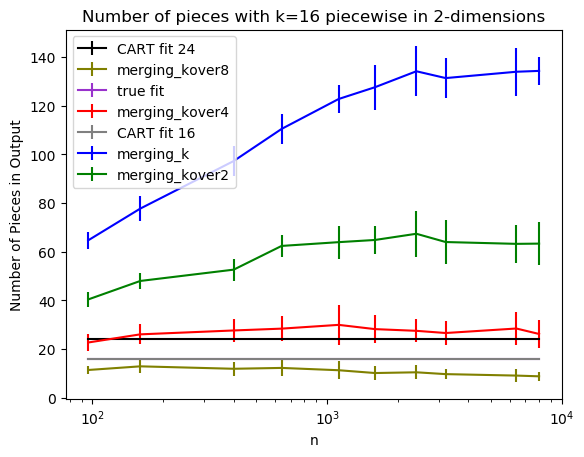

CART fit 16
16.0
merging_k
113.465
merging_kover2
59.02500000000001


PyObject Text(24.000000000000007, 0.5, 'Number of Pieces in Output')

In [26]:
for (algo_name, algo_pieces) in pieces_mean
    errorbar(n_vals, algo_pieces, yerr=pieces_std[algo_name], label=algo_name, color=algo_colors[algo_name])
    println(algo_name)
    println(mean(algo_pieces))
end
#plot(n_vals, 200.0 ./ n_vals, label="C/n")
#plot(n_vals, 5.0 ./ sqrt(n_vals), label="C/sqrt(n)", color="olive")
legend()
title("Number of pieces with k=16 piecewise in 2-dimensions")
yscale("linear")
xscale("log")
xlabel("n")
ylabel("Number of Pieces in Output")

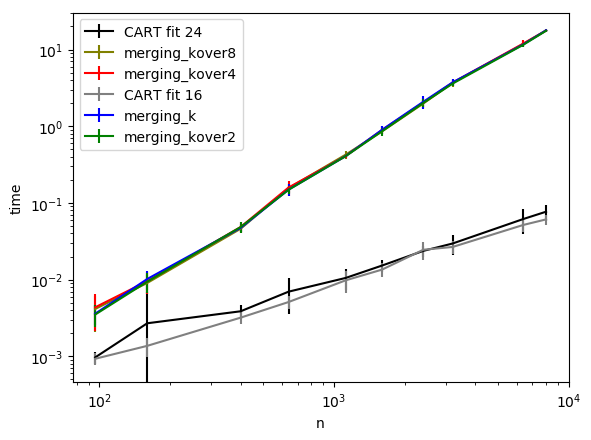

Dict{AbstractString,Array{Float64,1}}("CART fit 24"=>[0.000969987, 0.00270274, 0.00387391, 0.00697745, 0.0105302, 0.0152693, 0.0237303, 0.0296195, 0.0617645, 0.0769071],"merging_kover8"=>[0.00414727, 0.00906381, 0.0461331, 0.155797, 0.425621, 0.855888, 1.97886, 3.67782, 11.8296, 17.7174],"merging_kover4"=>[0.00436025, 0.00955388, 0.0485874, 0.158911, 0.407758, 0.892412, 2.04142, 3.7003, 11.9638, 17.6911],"CART fit 16"=>[0.0009307, 0.00137268, 0.00320089, 0.00511345, 0.0098031, 0.0135201, 0.0245476, 0.0267012, 0.0516985, 0.0610563],"merging_k"=>[0.00359504, 0.0102047, 0.047391, 0.149233, 0.407869, 0.896586, 2.08416, 3.72877, 11.6575, 17.7869],"merging_kover2"=>[0.00350871, 0.00942012, 0.0485195, 0.148647, 0.407221, 0.859819, 2.01402, 3.59778, 11.5424, 17.5509])


In [27]:
for (algo_name, algo_times) in times_mean
    errorbar(n_vals, algo_times, yerr=times_std[algo_name], label=algo_name, color=algo_colors[algo_name])
end
legend()
yscale("log")
xscale("log")
xlabel("n")
ylabel("time")

println(times_mean)


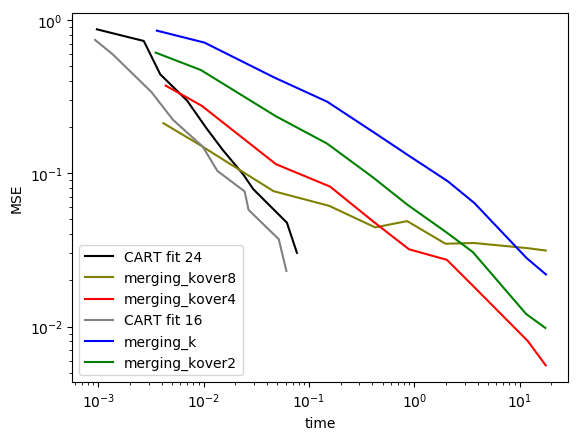

PyObject Text(24.000000000000007, 0.5, 'MSE')

In [28]:
for (algo_name, algo_times) in times_mean
    plot(algo_times, mses_mean[algo_name], label=algo_name, color=algo_colors[algo_name])
end
legend()
yscale("log")
xscale("log")
xlabel("time")
ylabel("MSE")